In [176]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)
%config InlineBackend.figure_format = 'retina'
fontname = 'AppleGothic'

fontname = 'AppleGothic' # seaborn의 set 함수 사용할 경우 지정해줬음 
sns.set(style='whitegrid', font = fontname)

## 국내 택배 물동량 및 1인당 연간 택배 이용량 추이 데이터
https://www.nlic.go.kr/nlic/parcelServiceUseCount.action 에 1인당 택배 이용량 존재

### 국내택배시장 물동량

In [101]:
home_delivery  = pd.read_excel('data/4.택배/국내택배시장물동량추이_수정.xlsx')
delivery = home_delivery.copy()
delivery.index = delivery['년도']
delivery.drop(columns=['년도'], inplace=True)
delivery

,물동량,전년대비 증감율,2012년대비 증감율
년도,,,
2012,140598,0.0820,0.000
2013,150931,0.0730,0.073
2014,162325,0.0750,0.155
2015,181596,0.1187,0.292
2016,204666,0.1270,0.456
2017,231946,0.1333,0.650
2018,254278,0.0960,0.809
2019,278980,0.0972,0.984
2020,337373,0.2093,1.400


In [103]:
delivery = delivery[['물동량']] 

In [104]:
mul = delivery['물동량'].copy() * 10000
delivery.loc[:, '물동량'] = mul

/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [105]:
delivery

,물동량
년도,
2012,1405980000
2013,1509310000
2014,1623250000
2015,1815960000
2016,2046660000
2017,2319460000
2018,2542780000
2019,2789800000
2020,3373730000


## 추계인구

In [106]:
population= pd.read_csv('data/4.택배/추계인구2012_2020.csv', encoding='CP949')
population

,가정별,"인구구조,부양비별",2020,2019,2018,2017,2016,2015,2014,2013,2012
0,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),총인구(명),51780579.00,51709098.0,51606633.00,51361911.00,51217803.0,51014947.00,50746659.00,50428893.00,50199853.00
1,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),남자(명),25945737.00,25913295.0,25863502.00,25736793.00,25670949.0,25585894.00,25445077.00,25285319.00,25187380.00
2,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),여자(명),25834842.00,25795803.0,25743131.00,25625118.00,25546854.0,25429053.00,25301582.00,25143574.00,25012473.00
3,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),성비(여자1백명당),100.40,100.5,100.50,100.40,100.5,100.60,100.60,100.60,100.70
4,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),인구성장률,0.14,0.2,0.48,0.28,0.4,0.53,0.63,0.46,0.53
5,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),인구(명): 0-14세,6296838.00,6434627.0,6589388.00,6724283.00,6864563.0,7029883.00,7213693.00,7392237.00,7577231.00
6,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),인구(명): 15-64세,37358309.00,37589552.0,37645085.00,37571568.00,37596157.0,37443896.00,37255840.00,37013997.00,36855893.00
7,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),인구(명): 65세 이상,8125432.00,7684919.0,7372160.00,7066060.00,6757083.0,6541168.00,6277126.00,6022659.00,5766729.00
8,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),- 구성비(%): 0-14세,12.20,12.4,12.80,13.10,13.4,13.80,14.20,14.70,15.10
9,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),- 구성비(%): 15-64세,72.10,72.7,72.90,73.20,73.4,73.40,73.40,73.40,73.40


In [107]:
pop = population.copy()
pop.drop(columns=['가정별'], inplace=True)
pop = pop[pop['인구구조,부양비별'] == '총인구(명)']
pop = pop.transpose()
pop.columns = ['총인구']
pop.drop(axis=0, index='인구구조,부양비별', inplace=True)
pop

,총인구
2020,5.17806e+07
2019,5.17091e+07
2018,5.16066e+07
2017,5.13619e+07
2016,5.12178e+07
2015,5.10149e+07
2014,5.07467e+07
2013,5.04289e+07
2012,5.01999e+07


In [128]:
delivery

,물동량
년도,
2012,1405980000
2013,1509310000
2014,1623250000
2015,1815960000
2016,2046660000
2017,2319460000
2018,2542780000
2019,2789800000
2020,3373730000


1인당 택배 이용량  
> 1인당 택배 이용량 = 연간 택배 물동량 / 추계인구

In [134]:
array_d = delivery['물동량'].values
array_d

array([1405980000, 1509310000, 1623250000, 1815960000, 2046660000,
       2319460000, 2542780000, 2789800000, 3373730000])

In [136]:
array_p = pop.sort_index()['총인구']
array_p = array_p.values
array_p

array([50199853.0, 50428893.0, 50746659.0, 51014947.0, 51217803.0,
       51361911.0, 51606633.0, 51709098.0, 51780579.0], dtype=object)

In [197]:
usage = array_d / array_p

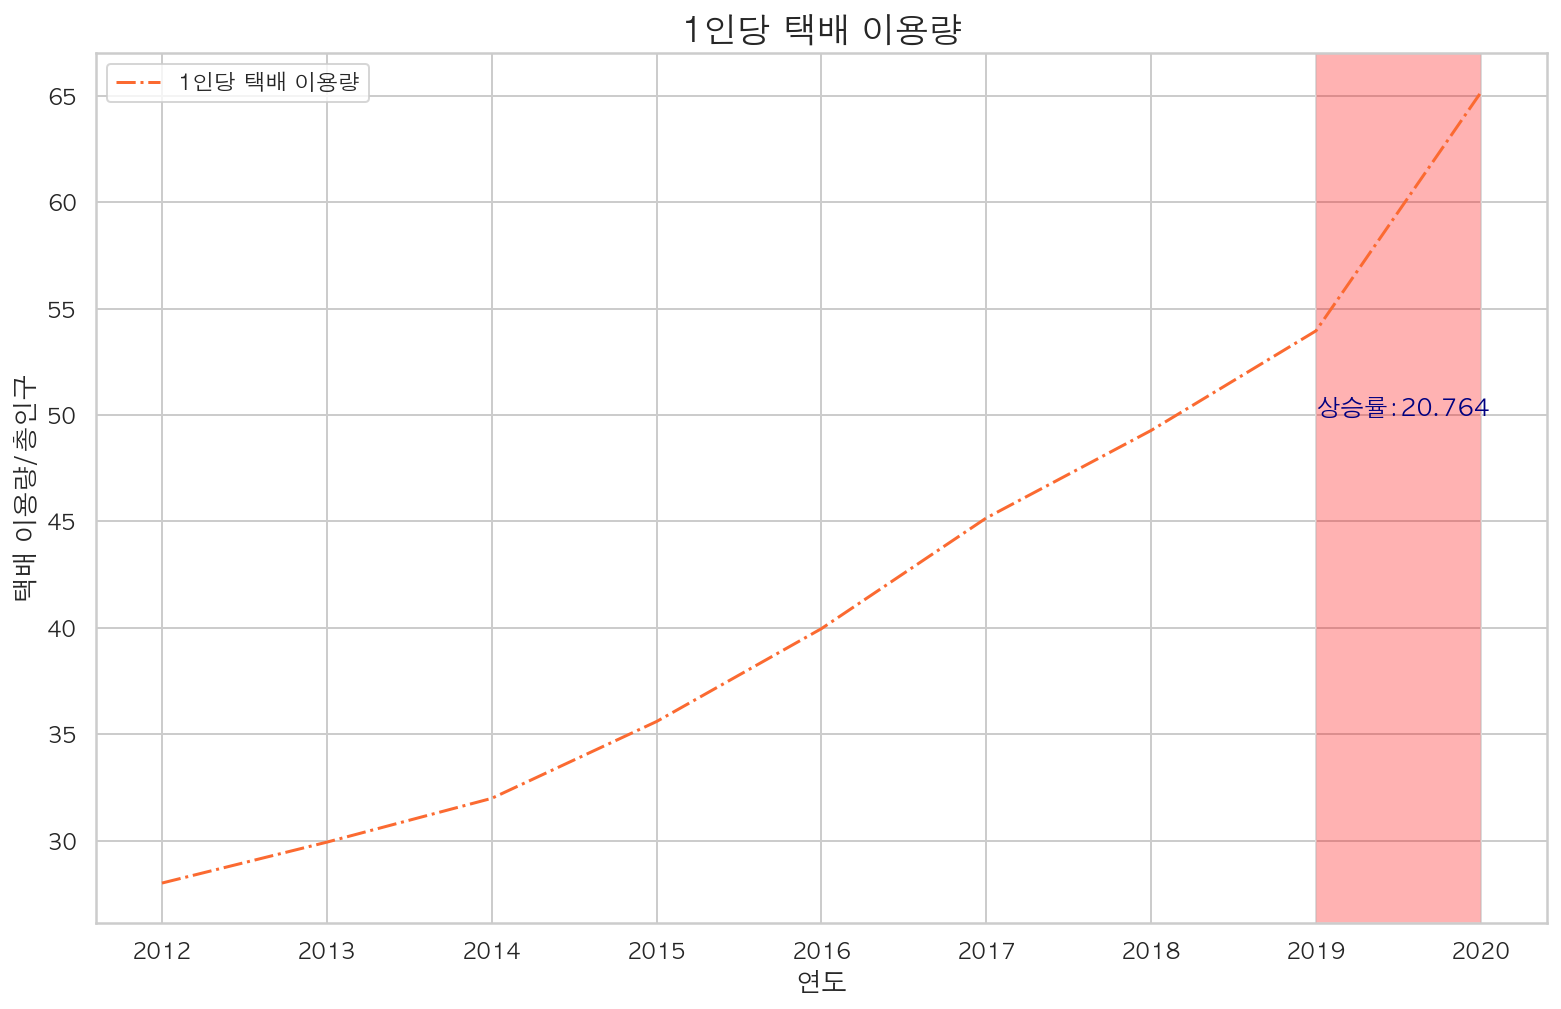

In [196]:
plt.figure(figsize=(13, 8))

plt.subplot(1, 1, 1)
plt.plot(np.arange(2012, 2021, 1), usage, label='1인당 택배 이용량', color='#fb6a31', linestyle = 'dashdot')

plt.axvspan(2019, 2020, facecolor='red', alpha=0.3)

font2 = {'family': 'AppleGothic',
         'color':  'navy',
         'weight': 'bold',
         'size': 12}

plt.text(2019, 50, '상승률:{:.3f}'.format(((usage[8] - usage[7]) / usage[7]) * 100), fontdict=font2)

plt.title('1인당 택배 이용량', fontsize = 17)
plt.xlabel('연도', fontsize = 13)
plt.ylabel('택배 이용량/총인구', fontsize = 13)
plt.xticks(np.arange(2012, 2021, 1), ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], fontsize = 11)

plt.legend()
plt.show()